# 3. Baseline Models - Gold Price Forecasting

**Objective:** Implement and evaluate baseline machine learning models.

**Author:** Félix Jouary  
**Dataset:** Kaggle Gold Price Dataset

**Models in this notebook:**
- Linear Regression (baseline)
- Ridge Regression
- Lasso Regression
- Decision Tree
- Random Forest
- Gradient Boosting

## 3.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

# Sklearn models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


## 3.2 Load Processed Data

In [2]:
# Load scaled data
X_train_scaled = np.load('../data/processed/X_train_scaled.npy')
X_test_scaled = np.load('../data/processed/X_test_scaled.npy')
y_train = np.load('../data/processed/y_train.npy')
y_test = np.load('../data/processed/y_test.npy')

# Load feature names
feature_names = pd.read_csv('../data/processed/feature_names.csv').iloc[:, 0].tolist()

# Load original data for visualization
train_data = pd.read_csv('../data/processed/train_data.csv', parse_dates=['Date'])
test_data = pd.read_csv('../data/processed/test_data.csv', parse_dates=['Date'])

print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"\nNumber of features: {len(feature_names)}")

X_train shape: (9228, 29)
X_test shape: (2308, 29)
y_train shape: (9228,)
y_test shape: (2308,)

Number of features: 29


## 3.3 Define Evaluation Metrics

For regression problems, we use:
- **RMSE** (Root Mean Squared Error): Penalizes large errors
- **MAE** (Mean Absolute Error): Average error magnitude
- **MAPE** (Mean Absolute Percentage Error): Percentage error
- **R²** (Coefficient of Determination): Explained variance

In [3]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    """Calculate and display regression metrics."""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{'='*50}")
    print(f"{model_name} - Evaluation Metrics")
    print(f"{'='*50}")
    print(f"RMSE:  ${rmse:.2f}")
    print(f"MAE:   ${mae:.2f}")
    print(f"MAPE:  {mape:.2f}%")
    print(f"R²:    {r2:.4f}")
    
    return {'Model': model_name, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2}

# Store results for comparison
results = []

## 3.4 Model 1: Linear Regression (Baseline)

In [4]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)

# Evaluate
print("TRAINING SET:")
_ = evaluate_model(y_train, y_pred_lr_train, "Linear Regression (Train)")

print("\nTEST SET:")
lr_results = evaluate_model(y_test, y_pred_lr_test, "Linear Regression")
results.append(lr_results)

TRAINING SET:

Linear Regression (Train) - Evaluation Metrics
RMSE:  $8.77
MAE:   $4.71
MAPE:  0.79%
R²:    0.9995

TEST SET:

Linear Regression - Evaluation Metrics
RMSE:  $13.77
MAE:   $9.40
MAPE:  0.62%
R²:    0.9977


## 3.5 Model 2: Ridge Regression (L2 Regularization)

In [5]:
# Hyperparameter tuning for Ridge
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

ridge_grid = GridSearchCV(
    Ridge(),
    ridge_params,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

ridge_grid.fit(X_train_scaled, y_train)

print(f"Best alpha: {ridge_grid.best_params_['alpha']}")
print(f"Best CV score (neg MSE): {ridge_grid.best_score_:.2f}")

Best alpha: 0.01
Best CV score (neg MSE): -74.64


In [6]:
# Train with best parameters
ridge_model = ridge_grid.best_estimator_

# Predictions
y_pred_ridge_train = ridge_model.predict(X_train_scaled)
y_pred_ridge_test = ridge_model.predict(X_test_scaled)

# Evaluate
print("TRAINING SET:")
_ = evaluate_model(y_train, y_pred_ridge_train, "Ridge Regression (Train)")

print("\nTEST SET:")
ridge_results = evaluate_model(y_test, y_pred_ridge_test, "Ridge Regression")
results.append(ridge_results)

TRAINING SET:

Ridge Regression (Train) - Evaluation Metrics
RMSE:  $8.77
MAE:   $4.71
MAPE:  0.79%
R²:    0.9995

TEST SET:

Ridge Regression - Evaluation Metrics
RMSE:  $13.77
MAE:   $9.40
MAPE:  0.62%
R²:    0.9977


## 3.6 Model 3: Lasso Regression (L1 Regularization)

In [7]:
# Hyperparameter tuning for Lasso
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

lasso_grid = GridSearchCV(
    Lasso(max_iter=10000),
    lasso_params,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

lasso_grid.fit(X_train_scaled, y_train)

print(f"Best alpha: {lasso_grid.best_params_['alpha']}")
print(f"Best CV score (neg MSE): {lasso_grid.best_score_:.2f}")

Best alpha: 0.01
Best CV score (neg MSE): -73.17


In [8]:
# Train with best parameters
lasso_model = lasso_grid.best_estimator_

# Predictions
y_pred_lasso_train = lasso_model.predict(X_train_scaled)
y_pred_lasso_test = lasso_model.predict(X_test_scaled)

# Evaluate
print("TRAINING SET:")
_ = evaluate_model(y_train, y_pred_lasso_train, "Lasso Regression (Train)")

print("\nTEST SET:")
lasso_results = evaluate_model(y_test, y_pred_lasso_test, "Lasso Regression")
results.append(lasso_results)

TRAINING SET:

Lasso Regression (Train) - Evaluation Metrics
RMSE:  $8.80
MAE:   $4.69
MAPE:  0.78%
R²:    0.9995

TEST SET:

Lasso Regression - Evaluation Metrics
RMSE:  $13.76
MAE:   $9.33
MAPE:  0.62%
R²:    0.9977


In [9]:
# Feature importance from Lasso (non-zero coefficients)
lasso_coef = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("Top 10 features by Lasso coefficient magnitude:")
print(lasso_coef.head(10))

# Count non-zero features
non_zero = (lasso_coef['Coefficient'] != 0).sum()
print(f"\nFeatures selected by Lasso: {non_zero}/{len(feature_names)}")

Top 10 features by Lasso coefficient magnitude:
           Feature  Coefficient
0            Price   383.790328
23   Volatility_7d     0.421578
24  Volatility_30d    -0.310768
20       Return_1d    -0.223583
1             Year     0.180159
4        DayOfWeek     0.092731
22      Return_30d    -0.090898
3              Day    -0.055152
5          Quarter     0.052793
26   Price_vs_MA30     0.035100

Features selected by Lasso: 14/29


## 3.7 Model 4: Decision Tree

In [10]:
# Hyperparameter tuning for Decision Tree
dt_params = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    dt_params,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

dt_grid.fit(X_train_scaled, y_train)

print(f"Best parameters: {dt_grid.best_params_}")
print(f"Best CV score (neg MSE): {dt_grid.best_score_:.2f}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV score (neg MSE): -37779.34


In [11]:
# Train with best parameters
dt_model = dt_grid.best_estimator_

# Predictions
y_pred_dt_train = dt_model.predict(X_train_scaled)
y_pred_dt_test = dt_model.predict(X_test_scaled)

# Evaluate
print("TRAINING SET:")
_ = evaluate_model(y_train, y_pred_dt_train, "Decision Tree (Train)")

print("\nTEST SET:")
dt_results = evaluate_model(y_test, y_pred_dt_test, "Decision Tree")
results.append(dt_results)

TRAINING SET:

Decision Tree (Train) - Evaluation Metrics
RMSE:  $3.05
MAE:   $1.31
MAPE:  0.22%
R²:    0.9999

TEST SET:

Decision Tree - Evaluation Metrics
RMSE:  $46.18
MAE:   $29.05
MAPE:  1.78%
R²:    0.9745


## 3.8 Model 5: Random Forest (Ensemble)

In [12]:
# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    rf_params,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train_scaled, y_train)

print(f"\nBest parameters: {rf_grid.best_params_}")
print(f"Best CV score (neg MSE): {rf_grid.best_score_:.2f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best CV score (neg MSE): -40139.48


In [13]:
# Train with best parameters
rf_model = rf_grid.best_estimator_

# Predictions
y_pred_rf_train = rf_model.predict(X_train_scaled)
y_pred_rf_test = rf_model.predict(X_test_scaled)

# Evaluate
print("TRAINING SET:")
_ = evaluate_model(y_train, y_pred_rf_train, "Random Forest (Train)")

print("\nTEST SET:")
rf_results = evaluate_model(y_test, y_pred_rf_test, "Random Forest")
results.append(rf_results)

TRAINING SET:

Random Forest (Train) - Evaluation Metrics
RMSE:  $3.99
MAE:   $2.14
MAPE:  0.35%
R²:    0.9999

TEST SET:

Random Forest - Evaluation Metrics
RMSE:  $50.76
MAE:   $28.23
MAPE:  1.64%
R²:    0.9691


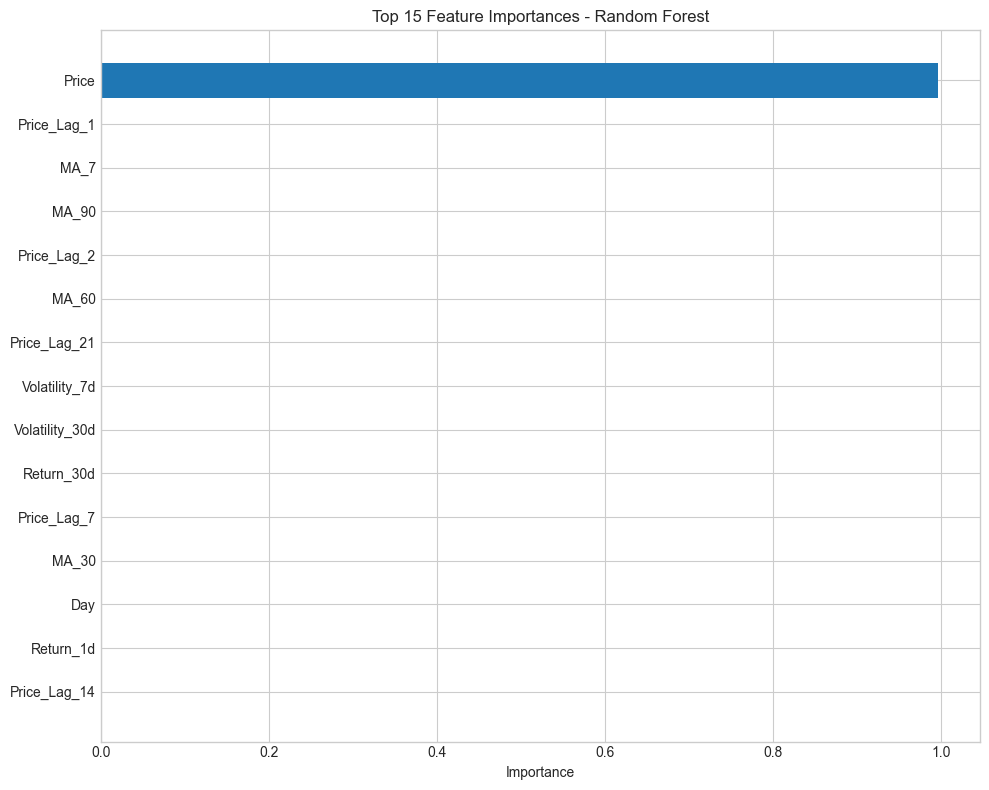

Top 10 most important features:
           Feature  Importance
0            Price    0.996897
7      Price_Lag_1    0.001152
15            MA_7    0.000985
19           MA_90    0.000318
8      Price_Lag_2    0.000183
18           MA_60    0.000059
13    Price_Lag_21    0.000042
23   Volatility_7d    0.000029
24  Volatility_30d    0.000026
22      Return_30d    0.000026


In [14]:
# Feature importance from Random Forest
rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 8))
plt.barh(rf_importance['Feature'].head(15)[::-1], rf_importance['Importance'].head(15)[::-1])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances - Random Forest')
plt.tight_layout()
plt.savefig('../reports/figures/rf_feature_importance.png', dpi=150)
plt.show()

print("Top 10 most important features:")
print(rf_importance.head(10))

## 3.9 Model 6: Gradient Boosting

In [15]:
# Hyperparameter tuning for Gradient Boosting
gb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5]
}

gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_params,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

gb_grid.fit(X_train_scaled, y_train)

print(f"\nBest parameters: {gb_grid.best_params_}")
print(f"Best CV score (neg MSE): {gb_grid.best_score_:.2f}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 50}
Best CV score (neg MSE): -41198.95


In [16]:
# Train with best parameters
gb_model = gb_grid.best_estimator_

# Predictions
y_pred_gb_train = gb_model.predict(X_train_scaled)
y_pred_gb_test = gb_model.predict(X_test_scaled)

# Evaluate
print("TRAINING SET:")
_ = evaluate_model(y_train, y_pred_gb_train, "Gradient Boosting (Train)")

print("\nTEST SET:")
gb_results = evaluate_model(y_test, y_pred_gb_test, "Gradient Boosting")
results.append(gb_results)

TRAINING SET:

Gradient Boosting (Train) - Evaluation Metrics
RMSE:  $3.52
MAE:   $2.54
MAPE:  0.51%
R²:    0.9999

TEST SET:

Gradient Boosting - Evaluation Metrics
RMSE:  $60.87
MAE:   $36.16
MAPE:  2.10%
R²:    0.9556


## 3.10 Overfitting Analysis

In [17]:
# Compare train vs test performance to detect overfitting
models_names = ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
train_preds = [y_pred_lr_train, y_pred_ridge_train, y_pred_lasso_train, y_pred_dt_train, y_pred_rf_train, y_pred_gb_train]
test_preds = [y_pred_lr_test, y_pred_ridge_test, y_pred_lasso_test, y_pred_dt_test, y_pred_rf_test, y_pred_gb_test]

overfitting_analysis = []
for name, train_pred, test_pred in zip(models_names, train_preds, test_preds):
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    gap = ((test_rmse - train_rmse) / train_rmse) * 100
    
    overfitting_analysis.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Gap (%)': gap
    })

overfit_df = pd.DataFrame(overfitting_analysis)
print("Overfitting Analysis (Train vs Test RMSE):")
print(overfit_df.to_string(index=False))
print("\nNote: Large positive gap indicates overfitting.")

Overfitting Analysis (Train vs Test RMSE):
            Model  Train RMSE  Test RMSE     Gap (%)
Linear Regression    8.772109  13.772212   57.000009
            Ridge    8.772202  13.771408   56.989189
            Lasso    8.796047  13.758665   56.418736
    Decision Tree    3.049756  46.175790 1414.081703
    Random Forest    3.987568  50.763001 1173.031697
Gradient Boosting    3.519106  60.868526 1629.658842

Note: Large positive gap indicates overfitting.


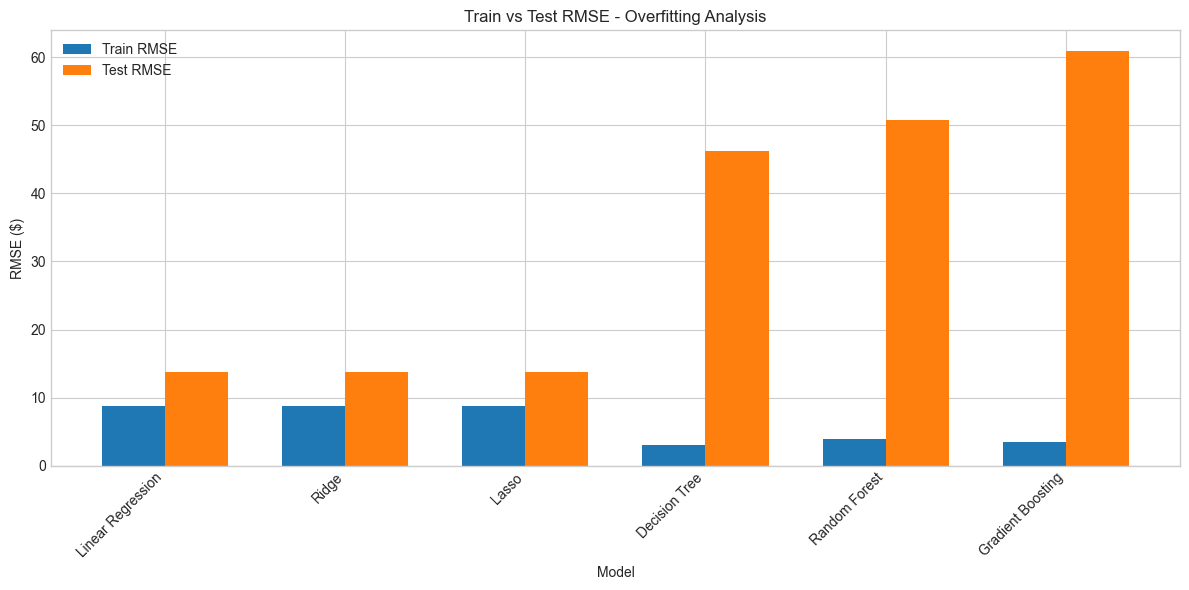

In [18]:
# Visualize overfitting
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(models_names))
width = 0.35

bars1 = ax.bar(x - width/2, overfit_df['Train RMSE'], width, label='Train RMSE')
bars2 = ax.bar(x + width/2, overfit_df['Test RMSE'], width, label='Test RMSE')

ax.set_xlabel('Model')
ax.set_ylabel('RMSE ($)')
ax.set_title('Train vs Test RMSE - Overfitting Analysis')
ax.set_xticks(x)
ax.set_xticklabels(models_names, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.savefig('../reports/figures/overfitting_analysis.png', dpi=150)
plt.show()

## 3.11 Model Comparison

In [19]:
# Create comparison dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('RMSE')

print("Model Comparison (sorted by RMSE):")
print(results_df.to_string(index=False))

Model Comparison (sorted by RMSE):
            Model      RMSE       MAE     MAPE       R2
 Lasso Regression 13.758665  9.329625 0.619402 0.997732
 Ridge Regression 13.771408  9.395665 0.623923 0.997728
Linear Regression 13.772212  9.395668 0.623918 0.997727
    Decision Tree 46.175790 29.049827 1.777908 0.974452
    Random Forest 50.763001 28.226488 1.636073 0.969123
Gradient Boosting 60.868526 36.158102 2.098161 0.955606


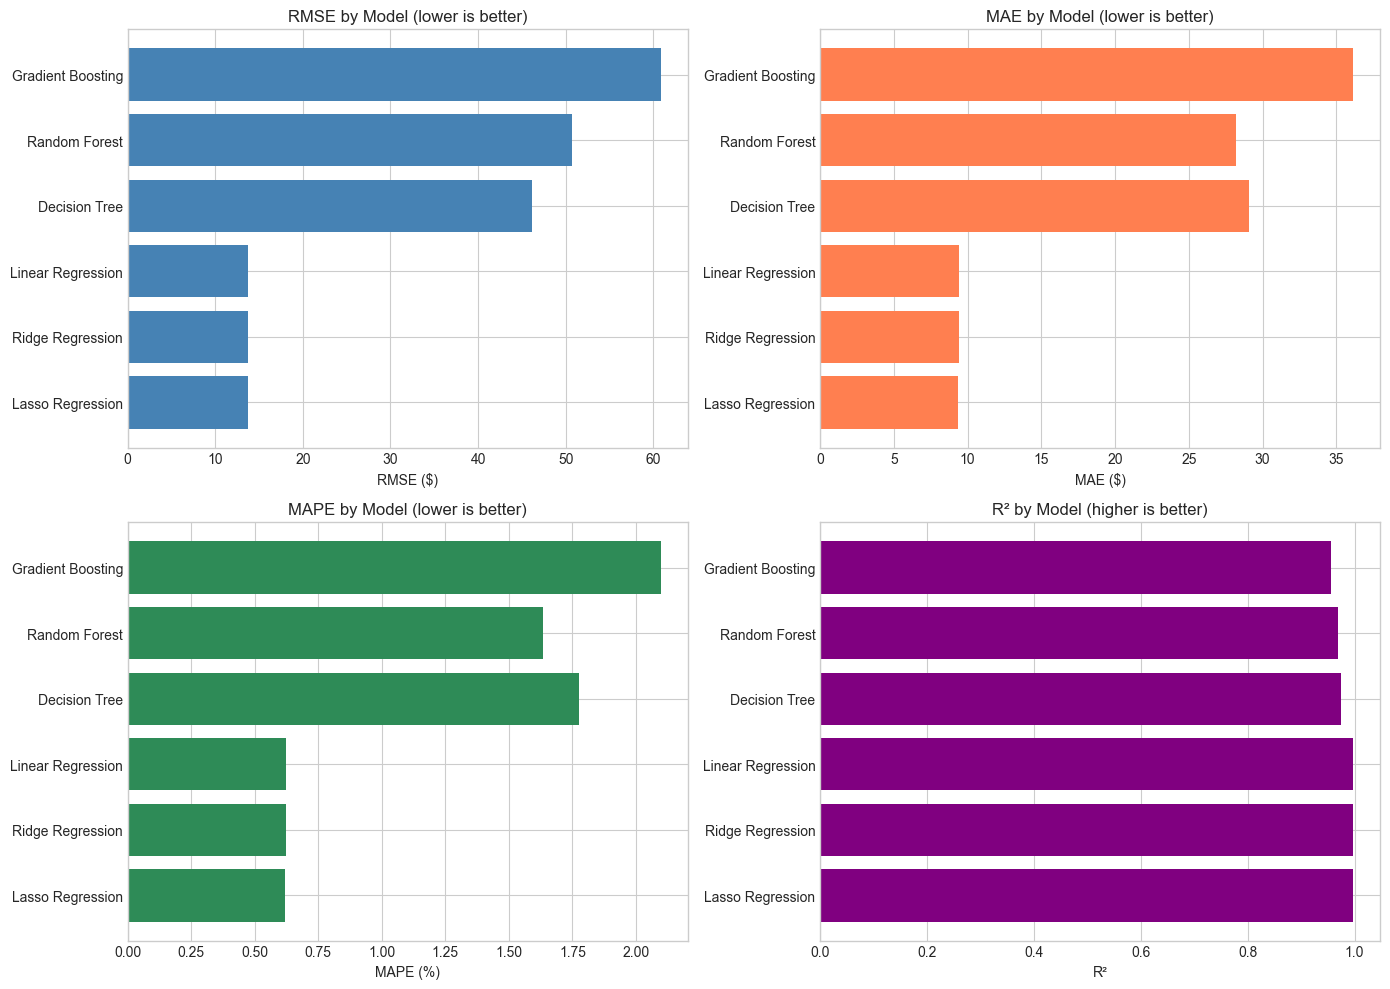

In [20]:
# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# RMSE
axes[0, 0].barh(results_df['Model'], results_df['RMSE'], color='steelblue')
axes[0, 0].set_xlabel('RMSE ($)')
axes[0, 0].set_title('RMSE by Model (lower is better)')

# MAE
axes[0, 1].barh(results_df['Model'], results_df['MAE'], color='coral')
axes[0, 1].set_xlabel('MAE ($)')
axes[0, 1].set_title('MAE by Model (lower is better)')

# MAPE
axes[1, 0].barh(results_df['Model'], results_df['MAPE'], color='seagreen')
axes[1, 0].set_xlabel('MAPE (%)')
axes[1, 0].set_title('MAPE by Model (lower is better)')

# R²
axes[1, 1].barh(results_df['Model'], results_df['R2'], color='purple')
axes[1, 1].set_xlabel('R²')
axes[1, 1].set_title('R² by Model (higher is better)')

plt.tight_layout()
plt.savefig('../reports/figures/model_comparison_baseline.png', dpi=150)
plt.show()

## 3.12 Predictions Visualization

In [21]:
# Plot actual vs predicted for best model
best_model_name = results_df.iloc[0]['Model']
print(f"Best model: {best_model_name}")

# Get predictions from best model
if best_model_name == 'Random Forest':
    best_pred = y_pred_rf_test
elif best_model_name == 'Gradient Boosting':
    best_pred = y_pred_gb_test
elif best_model_name == 'Ridge Regression':
    best_pred = y_pred_ridge_test
elif best_model_name == 'Linear Regression':
    best_pred = y_pred_lr_test
elif best_model_name == 'Lasso Regression':
    best_pred = y_pred_lasso_test
else:
    best_pred = y_pred_dt_test

Best model: Lasso Regression


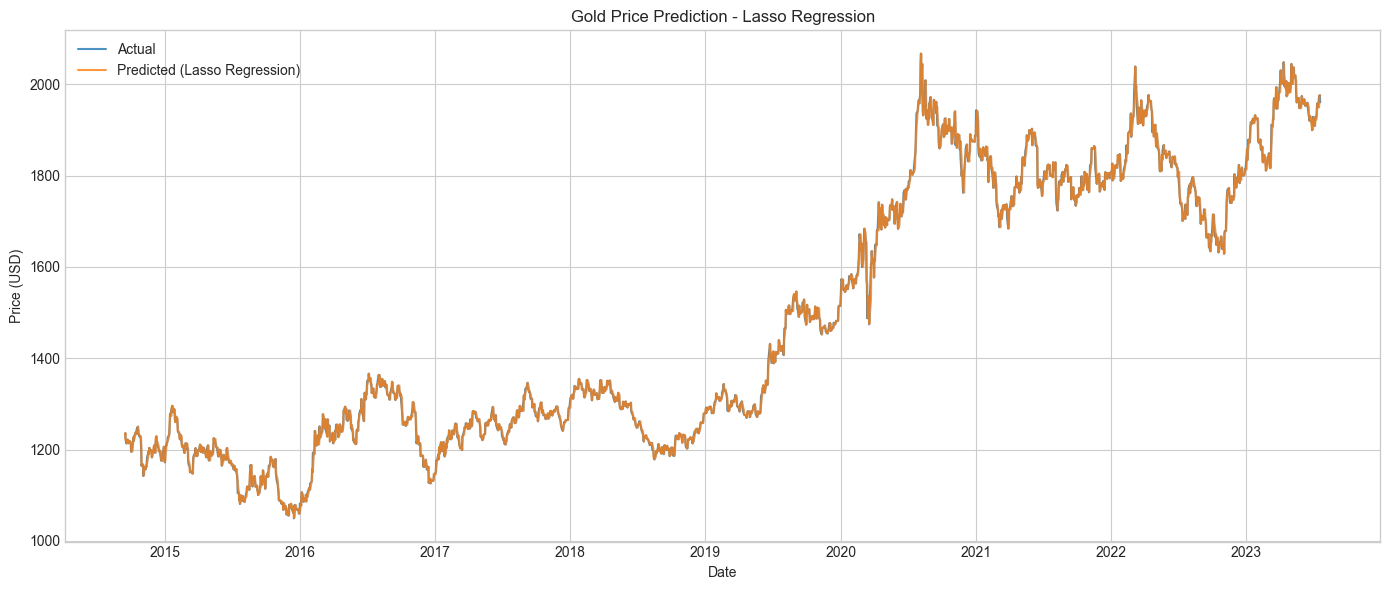

In [22]:
# Time series plot
plt.figure(figsize=(14, 6))
plt.plot(test_data['Date'], y_test, label='Actual', alpha=0.8)
plt.plot(test_data['Date'], best_pred, label=f'Predicted ({best_model_name})', alpha=0.8)
plt.title(f'Gold Price Prediction - {best_model_name}')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.savefig('../reports/figures/best_model_predictions.png', dpi=150)
plt.show()

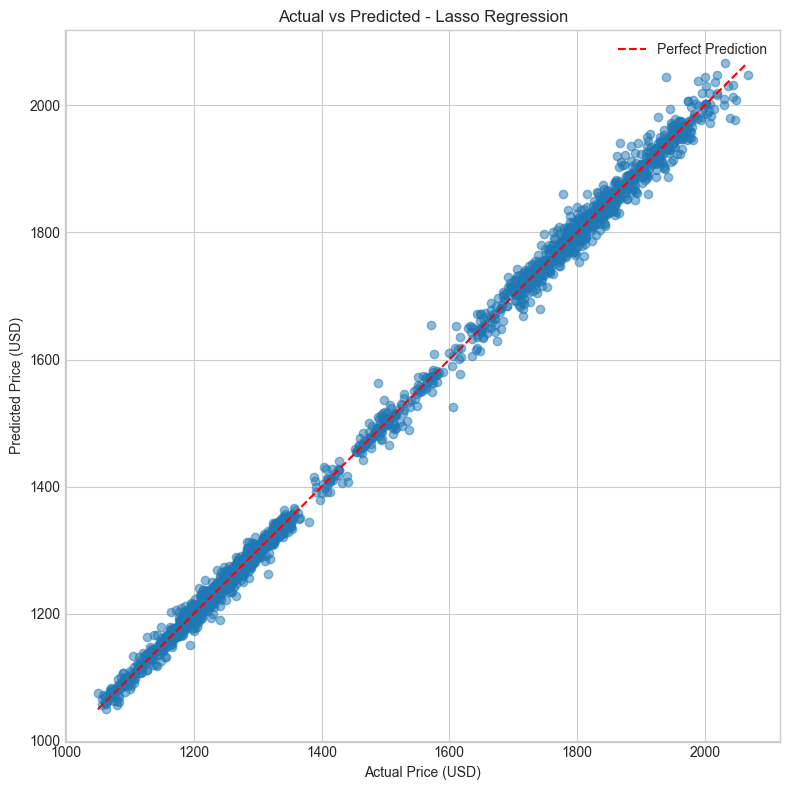

In [23]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 8))
plt.scatter(y_test, best_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title(f'Actual vs Predicted - {best_model_name}')
plt.legend()
plt.tight_layout()
plt.savefig('../reports/figures/actual_vs_predicted.png', dpi=150)
plt.show()

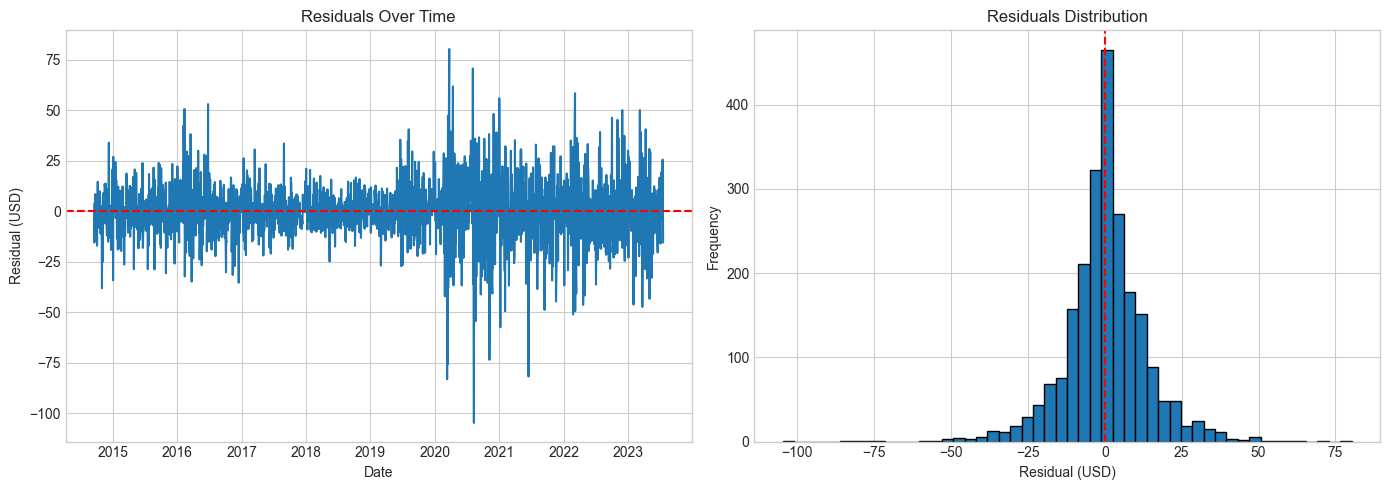

Residuals Mean: 0.22
Residuals Std: 13.76


In [24]:
# Residuals analysis
residuals = y_test - best_pred

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residuals over time
axes[0].plot(test_data['Date'], residuals)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_title('Residuals Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Residual (USD)')

# Residuals distribution
axes[1].hist(residuals, bins=50, edgecolor='black')
axes[1].axvline(x=0, color='r', linestyle='--')
axes[1].set_title('Residuals Distribution')
axes[1].set_xlabel('Residual (USD)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../reports/figures/residuals_analysis.png', dpi=150)
plt.show()

print(f"Residuals Mean: {residuals.mean():.2f}")
print(f"Residuals Std: {residuals.std():.2f}")

## 3.13 Save Models and Results

In [25]:
# Save all models
import os
os.makedirs('../models', exist_ok=True)

joblib.dump(lr_model, '../models/linear_regression.pkl')
joblib.dump(ridge_model, '../models/ridge_regression.pkl')
joblib.dump(lasso_model, '../models/lasso_regression.pkl')
joblib.dump(dt_model, '../models/decision_tree.pkl')
joblib.dump(rf_model, '../models/random_forest.pkl')
joblib.dump(gb_model, '../models/gradient_boosting.pkl')

# Save results
results_df.to_csv('../reports/baseline_results.csv', index=False)

print("All models saved successfully!")
print("\nFiles created:")
print("- ../models/linear_regression.pkl")
print("- ../models/ridge_regression.pkl")
print("- ../models/lasso_regression.pkl")
print("- ../models/decision_tree.pkl")
print("- ../models/random_forest.pkl")
print("- ../models/gradient_boosting.pkl")
print("- ../reports/baseline_results.csv")

All models saved successfully!

Files created:
- ../models/linear_regression.pkl
- ../models/ridge_regression.pkl
- ../models/lasso_regression.pkl
- ../models/decision_tree.pkl
- ../models/random_forest.pkl
- ../models/gradient_boosting.pkl
- ../reports/baseline_results.csv


## 3.14 Summary

### Baseline Models Implemented:

1. **Linear Regression** - Simple baseline
2. **Ridge Regression** - L2 regularization to prevent overfitting
3. **Lasso Regression** - L1 regularization for feature selection
4. **Decision Tree** - Non-linear model
5. **Random Forest** - Ensemble of decision trees
6. **Gradient Boosting** - Sequential ensemble learning

### Key Findings:

- All models use **TimeSeriesSplit** for cross-validation (respects temporal order)
- Hyperparameters were tuned using **GridSearchCV**
- Overfitting analysis performed comparing train vs test performance
- Feature importance analyzed for tree-based models

### Next Steps:

- Implement advanced models (XGBoost, LSTM)
- Try dimensionality reduction
- Final model comparison and selection

In [26]:
# Final summary
print("="*60)
print("BASELINE MODELS SUMMARY")
print("="*60)
print(f"\nBest Model: {results_df.iloc[0]['Model']}")
print(f"Best RMSE: ${results_df.iloc[0]['RMSE']:.2f}")
print(f"Best MAE: ${results_df.iloc[0]['MAE']:.2f}")
print(f"Best MAPE: {results_df.iloc[0]['MAPE']:.2f}%")
print(f"Best R²: {results_df.iloc[0]['R2']:.4f}")
print("="*60)

BASELINE MODELS SUMMARY

Best Model: Lasso Regression
Best RMSE: $13.76
Best MAE: $9.33
Best MAPE: 0.62%
Best R²: 0.9977
